# Python for Data Analysis - Final Projet

##### By Samuel Pariente and Marius Ortega

## Libraries

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
from matplotlib import pyplot as plt

In [89]:
import matplotlib.colors as plt_colors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

In [5]:
from mpl_toolkits.mplot3d import Axes3D

In [6]:
import numpy as np

In [7]:
from datetime import datetime, timedelta

In [8]:
import plotly.graph_objects as go

In [9]:
from plotly.subplots import make_subplots

In [10]:
from gensim.models import KeyedVectors

In [11]:
from sklearn.decomposition import PCA

In [12]:
from sklearn import preprocessing

In [13]:
import plotly.express as px

In [14]:
from collections import OrderedDict

In [15]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

In [16]:
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, BasicTicker, ColorBar, LinearColorMapper, PrintfTickFormatter
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap, transform
output_notebook()

Loading BokehJS ...

In [121]:
from bokeh.palettes import Spectral5
from bokeh.palettes import PRGn7
from bokeh.palettes import Magma7
from bokeh.palettes import Viridis
from bokeh.palettes import Pastel2_7

In [18]:
from wordcloud import WordCloud
from PIL import Image

In [19]:
from missingno import matrix

## Paths

In [20]:
vecto_path_marius = r"D:/COURS/A4/S7 - ESILV/Python for Data Analysis/Projet Final/GoogleNews-vectors-negative300.bin"

In [21]:
vecto_path_samuel = r"C:/Users/samue/OneDrive/Bureau/esilv/python final project/GoogleNews-vectors-negative300.bin"

## Datasets

### News Dataset

In [22]:
news = pd.read_csv("OnlineNewsPopularityWithAutorsAndTitles.csv")
news.head(5)

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...         731   
1  http://mashable.com/2013/01/07/ap-samsung-spon...         731   
2  http://mashable.com/2013/01/07/apple-40-billio...         731   
3  http://mashable.com/2013/01/07/astronaut-notre...         731   
4   http://mashable.com/2013/01/07/att-u-verse-apps/         731   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0               12                219          0.663594                1.0   
1                9                255          0.604743                1.0   
2                9                211          0.575130                1.0   
3                9                531          0.503788                1.0   
4               13               1072          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385           4                2          1  ...   
1                   0.791946           3                1          1  ...   
2                   0.663866           3                1          1  ...   
3                   0.665635           9                0          1  ...   
4                   0.540890          19               19         20  ...   

    avg_negative_polarity   min_negative_polarity   max_negative_polarity  \
0               -0.350000                  -0.600               -0.200000   
1               -0.118750                  -0.125               -0.100000   
2               -0.466667                  -0.800               -0.133333   
3               -0.369697                  -0.600               -0.166667   
4               -0.220192                  -0.500               -0.050000   

    title_subjectivity   title_sentiment_polarity   abs_title_subjectivity  \
0             0.500000                  -0.187500                 0.000000   
1             0.000000                   0.000000                 0.500000   
2             0.000000                   0.000000                 0.500000   
3             0.000000                   0.000000                 0.500000   
4             0.454545                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares         Authors  \
0                       0.187500      593   Lauren Indvik   
1                       0.000000      711  Seth Fiegerman   
2                       0.000000     1500  Seth Fiegerman   
3                       0.000000     1200       Space.com   
4                       0.136364      505     Emily Price   

                                              Titles  
0  Amazon's Streaming Video Library Now a Little ...  
1  AP's Twitter to Begin Displaying Sponsored Tweets  
2      Apple's App Store Passes 40 Billion Downloads  
3   This Astronaut Is Rooting for Notre Dame Tonight  
4  New U-Verse Apps Simplify Sharing Photos and V...  

[5 rows x 63 columns]

In [23]:
timeline = pd.read_csv("multiTimeline.csv")
timeline.head(5)

Semaine  Mashable: (Dans tous les pays)
0  2013-01-06                              58
1  2013-01-13                              61
2  2013-01-20                              56
3  2013-01-27                              58
4  2013-02-03                              57

#### Initial Columns descriptions

0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares (target)

In [24]:
news.shape

(39644, 63)

## 1 - Data Pre-processing

### 1.1 - Scrapping & Addition of Columns

Before we start, we notice that all columns names have a space before them. We remove them.

In [25]:
columns = news.columns
oldColumns = columns
columns = [elem.lstrip() for elem in columns]
dic_cols = {oldColumns[i]:columns[i] for i in range(len(columns))}
news.rename(columns=dic_cols, inplace=True)

##### Scrapping of Titles and Authors

In [26]:
scrap = False

In [27]:
if scrap:
    urls = news["url"]
    driver = webdriver.Chrome('chromedriver.exe')

    driver.get(urls[0])
    time.sleep(2)
    element = driver.find_elements(by = By.CSS_SELECTOR, value = 'div[id="onetrust-button-group"]')
    element[0].click()
    authors = []
    titles = []

    authors = []
    titles = []
    for i in range(0, len(urls[i])):
        driver.get(urls[i])
        time.sleep(0.5)
        try : 
            timer1 = WebDriverWait(driver, 2).until(EC.presence_of_element_located((By.CSS_SELECTOR,'a[class="underline-link"]')))
            timer2 = WebDriverWait(driver, 2).until(EC.presence_of_element_located((By.CSS_SELECTOR,'h1[class="mt-4 header-100 max-w-5xl "]')))
            name = driver.find_elements(by = By.CSS_SELECTOR, value = 'a[class="underline-link"]')
            title = driver.find_elements(by = By.CSS_SELECTOR, value = 'h1[class="mt-4 header-100 max-w-5xl "]')

            authors.append(name[0].text)
            titles.append(title[0].text)

        except (TimeoutException , NameError):
            authors.append('Nan')
            titles.append('Nan')
    news['Autors'] = authors
    news['titles'] = titles
    df.to_csv('OnlineNewsPopularityWithAutorsAndTitles.csv')

##### Addition of Data of release column

In [28]:
time = [x for x in range(8,732)]

temp = datetime.strptime("27/12/2014",'%d/%m/%Y')
date = []
for i in range(len(time)):
    date.append(temp)
    temp = temp - timedelta(1)

dico = {time[i]:date[i] for i in range(len(time))}
news['date'] = news['timedelta'].map(dico)

##### Addition of Timeline column

In [29]:
days = timeline['Semaine']
count = timeline['Mashable: (Dans tous les pays)']
days1 = []
for day in days:
    days1.append(datetime.strptime(day,'%Y-%m-%d'))

days2 = []
count1 = [] 
days2.append(datetime.strptime('2013-01-03','%Y-%m-%d'))
days2.append(datetime.strptime('2013-01-04','%Y-%m-%d'))
days2.append(datetime.strptime('2013-01-05','%Y-%m-%d'))
count1.append(8.28)
count1.append(8.28)
count1.append(8.28)
for day in days1:
    for i in range(7):
        days2.append(day + timedelta(i))

for coun in count:
    for i in range(7):
        count1.append(coun/7)
count1.append(4.7)
count1.append(4.7)
count1.append(4.7)
count1.append(4.7)
count1.append(4.7)
count1.append(4.7)
days2.append(datetime.strptime('2014-12-22','%Y-%m-%d'))
days2.append(datetime.strptime('2014-12-23','%Y-%m-%d'))
days2.append(datetime.strptime('2014-12-24','%Y-%m-%d'))
days2.append(datetime.strptime('2014-12-25','%Y-%m-%d'))
days2.append(datetime.strptime('2014-12-26','%Y-%m-%d'))
days2.append(datetime.strptime('2014-12-27','%Y-%m-%d'))
dico = {str(days2[i])[:10]:count1[i] for i in range(len(days2))}
news['NbVisit'] = news['date'].astype(str).map(dico)

### 1.2 - Cleaning

In the first place, let's study na proportions in news dataframe.

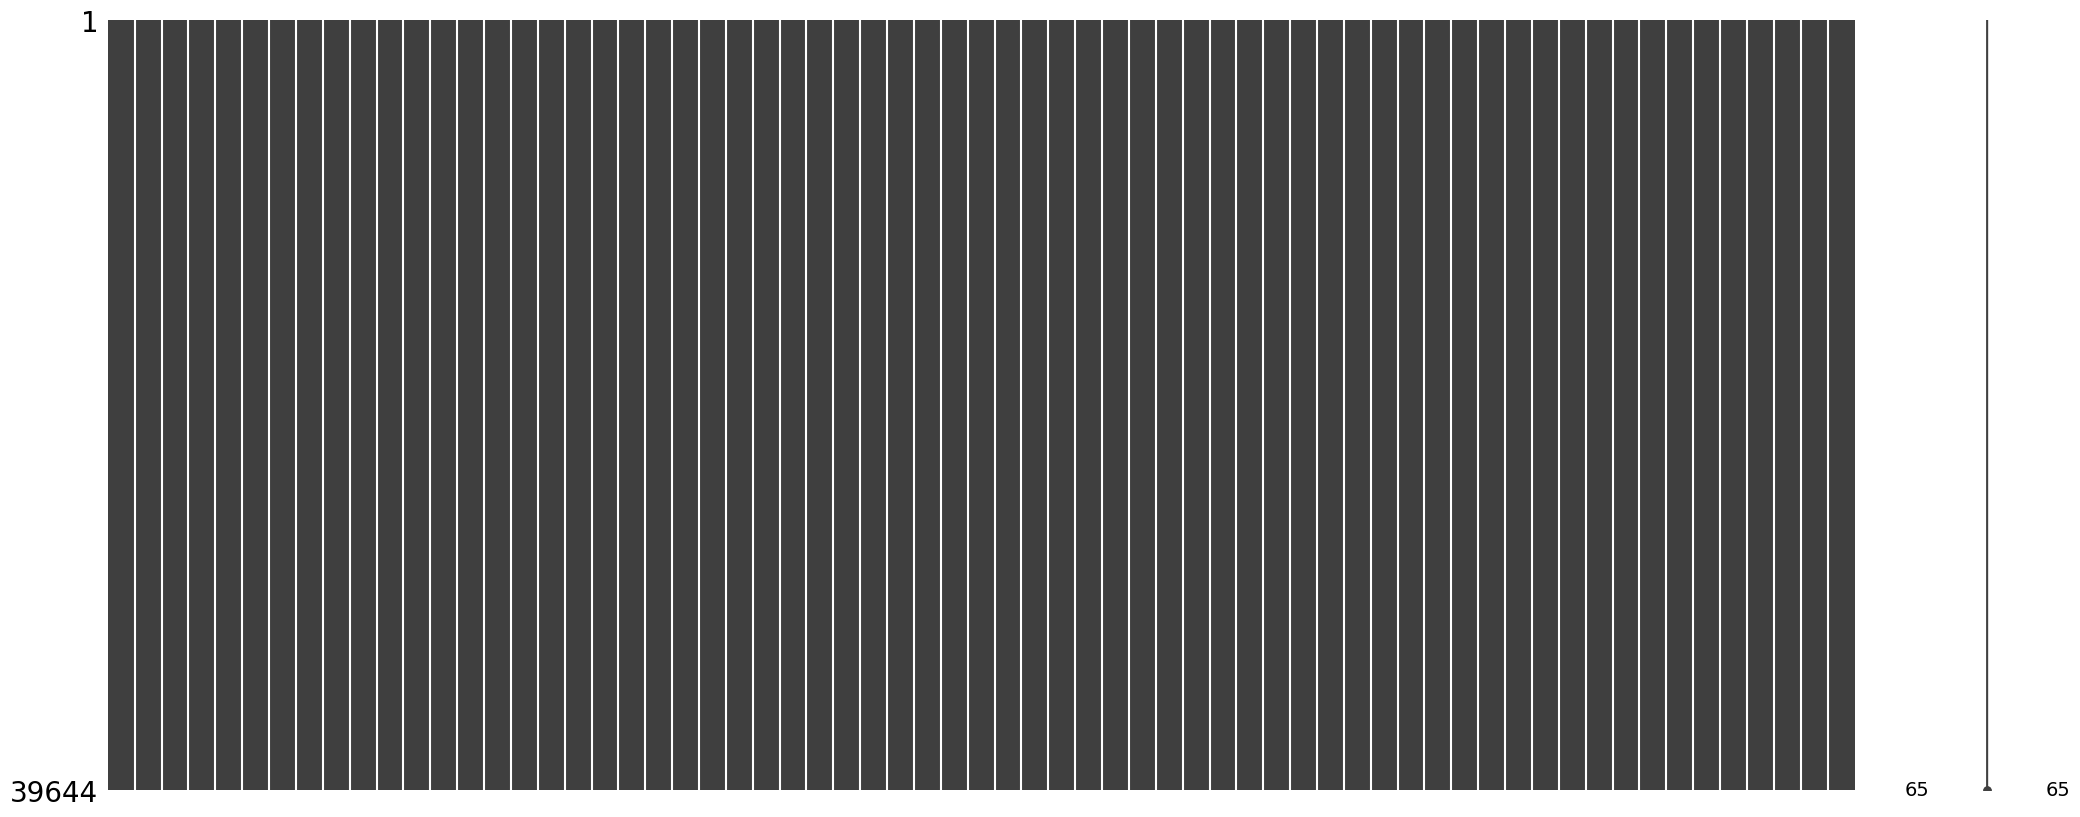

In [30]:
_=matrix(news)

There are no trivial na in our dataframe. 

##### Column 2 to 6 : Tokens

Now, we will drop articles that don't have a content

In [31]:
news = news[news["n_tokens_content"]>0]

Columns 4 to 6 are ratios. We must verify that all values lie between 0 and 1.

In [32]:
for i in range(4, 7): 
    news = news[((news.iloc[:, i] >= 0) & (news.iloc[:, i] <=1))]

##### Column 13 to 18 : News Chanels

News Chanels columns are 1hot encoded. Ultimately, we want to vectorize these columns. Thus, we must tranform them to actual words by decoding them.

In [33]:
summary_13_to_18 = []
for index in range(news.shape[0]):
    if news.iloc[index, 13] == 1:
        summary_13_to_18.append("LifeStyle")
    elif news.iloc[index, 14] == 1:
        summary_13_to_18.append("Entertainment")
    elif news.iloc[index, 15] == 1:
        summary_13_to_18.append("Business")
    elif news.iloc[index, 16] == 1:
        summary_13_to_18.append("Social Media")
    elif news.iloc[index, 17] == 1:
        summary_13_to_18.append("Tech")
    elif news.iloc[index, 18] == 1:
        summary_13_to_18.append("World")
    else:
        summary_13_to_18.append("Others")
news["Chanel"] = summary_13_to_18

##### Columns 19 to 27 : Keywords

Columns 19 to 27 represent numbers of shares, thus we must verify if there are any negative values. If we find any, we equal them to 0.

In [34]:
for i in range(19, 28):
    news.iloc[:, i] = [x if x>=0 else 0 for x in news.iloc[:, i]]

##### Columns 31 to 37

Same operations than columns 13 to 18

In [35]:
summary_31_to_37 = []
for index in range(news.shape[0]):
    if news.iloc[index, 31] == 1:
        summary_31_to_37.append("Monday")
    elif news.iloc[index, 32] == 1:
        summary_31_to_37.append("Tuesday")
    elif news.iloc[index, 33] == 1:
        summary_31_to_37.append("Wednesday")
    elif news.iloc[index, 34] == 1:
        summary_31_to_37.append("Thursday")
    elif news.iloc[index, 35] == 1:
        summary_31_to_37.append("Friday")
    elif news.iloc[index, 36] == 1:
        summary_31_to_37.append("Saturday")
    elif news.iloc[index, 37] == 1:
        summary_31_to_37.append("Sunday")
    else:
        summary_31_to_37.append("Unknown")
news["Weekday"] = summary_31_to_37 

##### Columns 39 to 43 : Latent Dirichelet Allocation Topics

These columns are ratios, we verify if they all lie between 0 and 1.

In [36]:
print(f'LDA_00 : {(news[(news["LDA_00"]<0) | (news["LDA_00"]<0)].url.count())}')
print(f'LDA_01 : {(news[(news["LDA_01"]<0) | (news["LDA_01"]<0)].url.count())}')
print(f'LDA_02 : {(news[(news["LDA_02"]<0) | (news["LDA_02"]<0)].url.count())}')
print(f'LDA_03 : {(news[(news["LDA_03"]<0) | (news["LDA_03"]<0)].url.count())}')

LDA_00 : 0
LDA_01 : 0
LDA_02 : 0
LDA_03 : 0


In [37]:
news[(news["LDA_03"].isna() == True)]

Empty DataFrame
Columns: [url, timedelta, n_tokens_title, n_tokens_content, n_unique_tokens, n_non_stop_words, n_non_stop_unique_tokens, num_hrefs, num_self_hrefs, num_imgs, num_videos, average_token_length, num_keywords, data_channel_is_lifestyle, data_channel_is_entertainment, data_channel_is_bus, data_channel_is_socmed, data_channel_is_tech, data_channel_is_world, kw_min_min, kw_max_min, kw_avg_min, kw_min_max, kw_max_max, kw_avg_max, kw_min_avg, kw_max_avg, kw_avg_avg, self_reference_min_shares, self_reference_max_shares, self_reference_avg_sharess, weekday_is_monday, weekday_is_tuesday, weekday_is_wednesday, weekday_is_thursday, weekday_is_friday, weekday_is_saturday, weekday_is_sunday, is_weekend, LDA_00, LDA_01, LDA_02, LDA_03, LDA_04, global_subjectivity, global_sentiment_polarity, global_rate_positive_words, global_rate_negative_words, rate_positive_words, rate_negative_words, avg_positive_polarity, min_positive_polarity, max_positive_polarity, avg_negative_polarity, min_negative_polarity, max_negative_polarity, title_subjectivity, title_sentiment_polarity, abs_title_subjectivity, abs_title_sentiment_polarity, shares, Authors, Titles, date, NbVisit, Chanel, Weekday]
Index: []

[0 rows x 67 columns]

##### Column 60 : Shares (target)

Some articles might have especially high numbers of shares in comparison to the rest of the dataframe. To fix it, we can apply a logarithm scale on "Shares" column. 

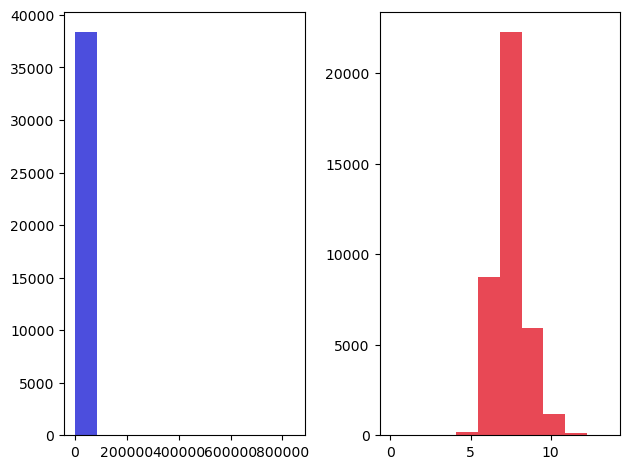

In [38]:
f, axs = plt.subplots(1, 2)

_=axs[0].hist(x=news["shares"], color = '#4C4EDD')
_=axs[1].hist(x=np.log(news["shares"]), color = '#E84855')


plt.tight_layout()

In [39]:
news["shares"] = np.log(news["shares"])

##### Column 61 and 62 : Authors and Titles (scraped data)

We scraped these two column from Mashable.com outselves. Thus, there can be na's. Let's study them.

In [40]:
print(f'Nan in Authors: {news[news["Authors"] == "Nan"].url.count()}')
print(f'Nan in Titles: {news[news["Titles"] == "Nan"].url.count()}')

Nan in Authors: 619
Nan in Titles: 619


We have 619 rows with unknown authors and titles, we notice that they are the same columns so we drop them. 

In [41]:
news = news[news["Authors"] != "Nan"]

### 1.3 - Vectorization

First, we load the google's vectorization model.

In [42]:
load = True

In [43]:
if load:
    google_vecto_model = KeyedVectors.load_word2vec_format(vecto_path_marius, binary=True)

##### Chanels' vectorization

In [44]:
news.reset_index(drop = True, inplace = True)

In [45]:
chanels = news.Chanel.unique()
chanels = [x if x != "Social Media" else "SocialMedia" for x in chanels]
vec_chanels = {(chanel):(google_vecto_model[chanel] if chanel != "Others" else [0 for i in range(300)]) for chanel in chanels}
vec_chanels["Social Media"] = vec_chanels.pop("SocialMedia")

all_vect_cols = []
vec_len = len(vec_chanels["Social Media"])
for i in range(vec_len):
    all_vect_cols.append([])

for row in news["Chanel"]:
    for i in range(vec_len):
        all_vect_cols[i].append(vec_chanels[row][i])
        
name_cols_chanels_vec = [f"WChanel {i}" for i in range(vec_len)]
df_chanel_vec = pd.DataFrame(np.transpose(all_vect_cols), columns=name_cols_chanels_vec)
news = pd.concat((news, df_chanel_vec), axis = 1)

### 1.4 - Creation of the working dataframes

##### Visualization dataframe

In [46]:
v_news = news.copy()

In [47]:
vecto_cols = [f"WChanel {i}" for i in range(300)]
_=v_news.drop(columns=vecto_cols, inplace = True)

_=v_news.drop(columns=['data_channel_is_lifestyle'], inplace = True)
_=v_news.drop(columns=['data_channel_is_entertainment'], inplace = True)
_=v_news.drop(columns=['data_channel_is_bus'], inplace = True)
_=v_news.drop(columns=['data_channel_is_socmed'], inplace = True)
_=v_news.drop(columns=['data_channel_is_tech'], inplace = True)
_=v_news.drop(columns=['data_channel_is_world'], inplace = True)

_=v_news.drop(columns=['weekday_is_monday'], inplace = True)
_=v_news.drop(columns=['weekday_is_tuesday'], inplace = True)
_=v_news.drop(columns=['weekday_is_wednesday'], inplace = True)
_=v_news.drop(columns=['weekday_is_thursday'], inplace = True)
_=v_news.drop(columns=['weekday_is_friday'], inplace = True)
_=v_news.drop(columns=['weekday_is_saturday'], inplace = True)
_=v_news.drop(columns=['weekday_is_sunday'], inplace = True)
_=v_news.drop(columns=['url'], inplace = True)
_=v_news.drop(columns=['timedelta'], inplace = True)

##### Modeling dataframe

# !!!!Normalize the data!!!!

In [48]:
m_news = news.copy()

In [49]:
_=m_news.drop(columns=['Chanel'], inplace = True)
_=m_news.drop(columns=['Weekday'], inplace = True)
_=m_news.drop(columns=['url'], inplace = True)
_=m_news.drop(columns=['date'], inplace = True)
_=m_news.drop(columns=['Authors'], inplace = True)
_=m_news.drop(columns=['Titles'], inplace = True)

We normalize the data for better accuracy of our machine and deep learning models.

In [50]:
x = m_news.values
cols = m_news.columns
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
m_news = pd.DataFrame(x_scaled, columns=cols)

## 2 - Data discovery 

### 2.1 - Univariate discovery

In [51]:
week_ref = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
Weekday_counts = v_news.groupby(by="Weekday").Weekday.count().reindex(week_ref)
index = list(Weekday_counts.index)
values = list(Weekday_counts.values)

source = ColumnDataSource(data=OrderedDict(weekday=index, counts=values))

p = figure(x_range=index, y_range=(0, np.max(values)+1000), height=350, title="Release Day Frequencies",
           toolbar_location=None, tools="hover", tooltips="@weekday: @counts")

p.vbar(x='weekday', top='counts', width=0.9, source=source, 
       line_color='white', fill_color=factor_cmap('weekday', palette=PRGn7, factors=index))

p.xgrid.grid_line_color = None

_=show(p, notebook_handle=True)

In [52]:
chanel = v_news.groupby(by="Chanel").Chanel.count()

fig = go.Figure(data=go.Scatterpolar(
  r=chanel.values,
  theta=chanel.index,
  fill='toself',
  name='Frequencies of Chanels'
))

fig.update_layout(
  title={
      'text': "Frequencies of Chanels", 
      'y': 0.9,
      'x': 0.5
  },
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=False
)

fig.show()

In [53]:
autnb = v_news.groupby('Authors').count()['Titles'].sort_values(ascending = False)[:10]
autnb =autnb.reset_index()


fig = px.sunburst(autnb, path=['Authors'], values = 'Titles',title = "TOP 10 des acteurs ayant joué dans le plus de genres différents")
fig.show()

In [54]:
dates_by_months = v_news.groupby(v_news['date'].dt.strftime('%Y-%m')).date.count()
fig = go.Figure()
fig.add_trace(go.Scatter(x=dates_by_months.index, y=dates_by_months.values, name="spline",
    text=["tweak line smoothness<br>with 'smoothing' in line object"],
    hoverinfo='x+y',
    line_shape='spline'))

fig.update_layout(
  title={
      'text': "Frequencies of Releases", 
      'y': 0.9,
      'x': 0.5},
  showlegend=False,
)

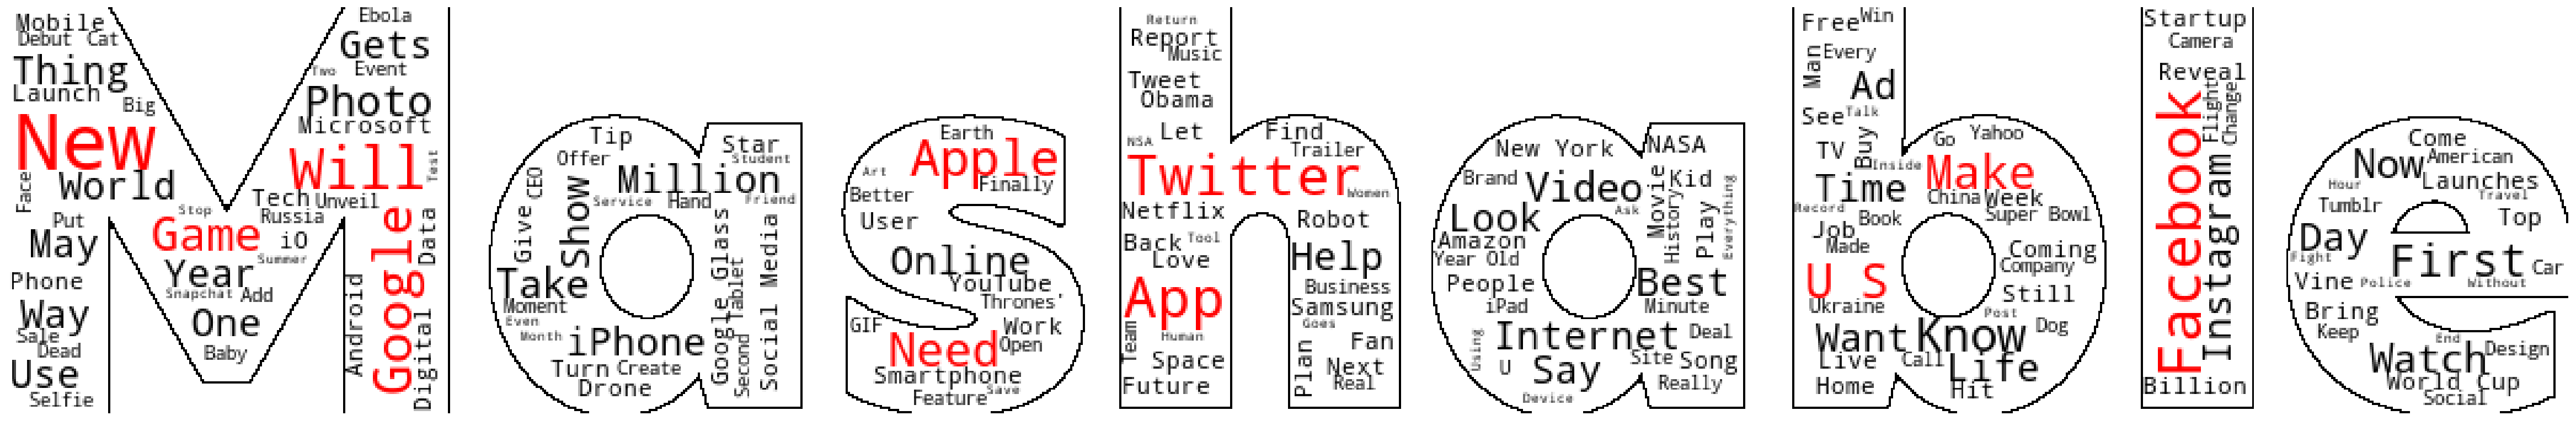

In [55]:
words = []
for x in v_news['Titles']:
    for y in x.split(' '):
        words.append(y)
text = ' '.join(words)
mask = np.array(Image.open("Mlogo.png"))
mask[mask == 0] = 255
wordcloud = WordCloud(background_color = 'white', max_words = 200, mask =mask,contour_width=1).generate(text)
i = 0
def couleur(*args, **kwargs):
    import random 
    global i 
    if i < 11:
        i = i+1
        return "rgb(255, 0, 0)" 
    if i > 10:
        return "rgb(0, 0, 0)"

plt.subplots(figsize=(60, 20))
plt.imshow(wordcloud.recolor(color_func = couleur))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

# !!!!! faire des boxplot alignés pour les autres analyses univariées !!!!!

In [56]:
v_news.describe().T

count           mean           std        min  \
n_tokens_title                37843.0      10.385408  2.112963e+00   2.000000   
n_tokens_content              37843.0     563.012922  4.680947e+02  18.000000   
n_unique_tokens               37843.0       0.547000  1.023195e-01   0.114964   
n_non_stop_words              37843.0       1.000000  4.035708e-09   1.000000   
n_non_stop_unique_tokens      37843.0       0.693687  1.006012e-01   0.119134   
num_hrefs                     37843.0      11.194858  1.131695e+01   0.000000   
num_self_hrefs                37843.0       3.386862  3.851933e+00   0.000000   
num_imgs                      37843.0       4.553735  8.302493e+00   0.000000   
num_videos                    37843.0       1.258225  4.157840e+00   0.000000   
average_token_length          37843.0       4.688440  2.833917e-01   3.600000   
num_keywords                  37843.0       7.210078  1.915736e+00   1.000000   
kw_min_min                    37843.0      27.241630  7.001529e+01   0.000000   
kw_max_min                    37843.0    1152.446676  3.891818e+03   0.000000   
kw_avg_min                    37843.0     314.055853  6.277245e+02   0.000000   
kw_min_max                    37843.0   13182.626721  5.687276e+04   0.000000   
kw_max_max                    37843.0  750482.078588  2.162370e+05   0.000000   
kw_avg_max                    37843.0  255292.496060  1.317705e+05   0.000000   
kw_min_avg                    37843.0    1100.923817  1.127489e+03   0.000000   
kw_max_avg                    37843.0    5601.573013  6.102199e+03   0.000000   
kw_avg_avg                    37843.0    3101.998182  1.297151e+03   0.000000   
self_reference_min_shares     37843.0    4117.587187  2.006364e+04   0.000000   
self_reference_max_shares     37843.0   10641.670263  4.169804e+04   0.000000   
self_reference_avg_sharess    37843.0    6606.100044  2.464113e+04   0.000000   
is_weekend                    37843.0       0.129377  3.356208e-01   0.000000   
LDA_00                        37843.0       0.188313  2.656879e-01   0.018182   
LDA_01                        37843.0       0.141701  2.204217e-01   0.018182   
LDA_02                        37843.0       0.217285  2.822576e-01   0.018182   
LDA_03                        37843.0       0.214233  2.889639e-01   0.018182   
LDA_04                        37843.0       0.238469  2.912201e-01   0.018182   
global_subjectivity           37843.0       0.456804  8.826387e-02   0.000000   
global_sentiment_polarity     37843.0       0.122760  9.600733e-02  -0.393750   
global_rate_positive_words    37843.0       0.040820  1.621422e-02   0.000000   
global_rate_negative_words    37843.0       0.017129  1.058298e-02   0.000000   
rate_positive_words           37843.0       0.702889  1.503226e-01   0.000000   
rate_negative_words           37843.0       0.297005  1.501798e-01   0.000000   
avg_positive_polarity         37843.0       0.364579  8.540039e-02   0.000000   
min_positive_polarity         37843.0       0.098379  7.037527e-02   0.000000   
max_positive_polarity         37843.0       0.779680  2.125564e-01   0.000000   
avg_negative_polarity         37843.0      -0.267472  1.211110e-01  -1.000000   
min_negative_polarity         37843.0      -0.537894  2.794271e-01  -1.000000   
max_negative_polarity         37843.0      -0.110794  9.486903e-02  -1.000000   
title_subjectivity            37843.0       0.280369  3.235696e-01   0.000000   
title_sentiment_polarity      37843.0       0.070735  2.644935e-01  -1.000000   
abs_title_subjectivity        37843.0       0.342580  1.886059e-01   0.000000   
abs_title_sentiment_polarity  37843.0       0.154944  2.257259e-01   0.000000   
shares                        37843.0       7.469655  9.258769e-01   0.000000   
NbVisit                       37843.0       7.422285  1.143989e+00   4.700000   

                                        25%            50%            75%  \
n_tokens_title                     9.000000      10.000000      12

### 2.2 - Data Analysis

##### Proximity of articles

In [57]:
lda = v_news.loc[:, "LDA_00":"LDA_04"]
pca = PCA(n_components=3)
pca.fit(lda)
explanation_coefs = pca.explained_variance_ratio_
pca_values = pca.transform(lda)
np.sum(explanation_coefs)

0.8375338639272234

With the columns we selected, 84% of the data is explained.

In [58]:
lda["Chanel"] = v_news["Chanel"]
map_colors = {
    "Entertainment":"limegreen",
    "Business": "darkturquoise",
    "Tech": "orchid",
    "LifeStyle": "royalblue",
    "World": "gold",
    "Others": "tomato",
    "Social Media": "pink"
}
colors = v_news["Chanel"].map(map_colors)

In [59]:
fig = px.scatter_3d(x=pca_values[:200, 0], y=pca_values[:200, 1], z=pca_values[:200, 2],
              color = lda["Chanel"].head(200), opacity=0.7)
        
# tight layout
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    legend_title="Chanels"
)

##### Correlation heatmap

In [60]:
corr = v_news.corr()
fig = px.imshow(corr,color_continuous_scale='RdBu_r', text_auto=True)
fig.show()

## 3 - Recipe for the perfect article 

##### Average polarity and subjectivity, how they interact and affect shares of a given article

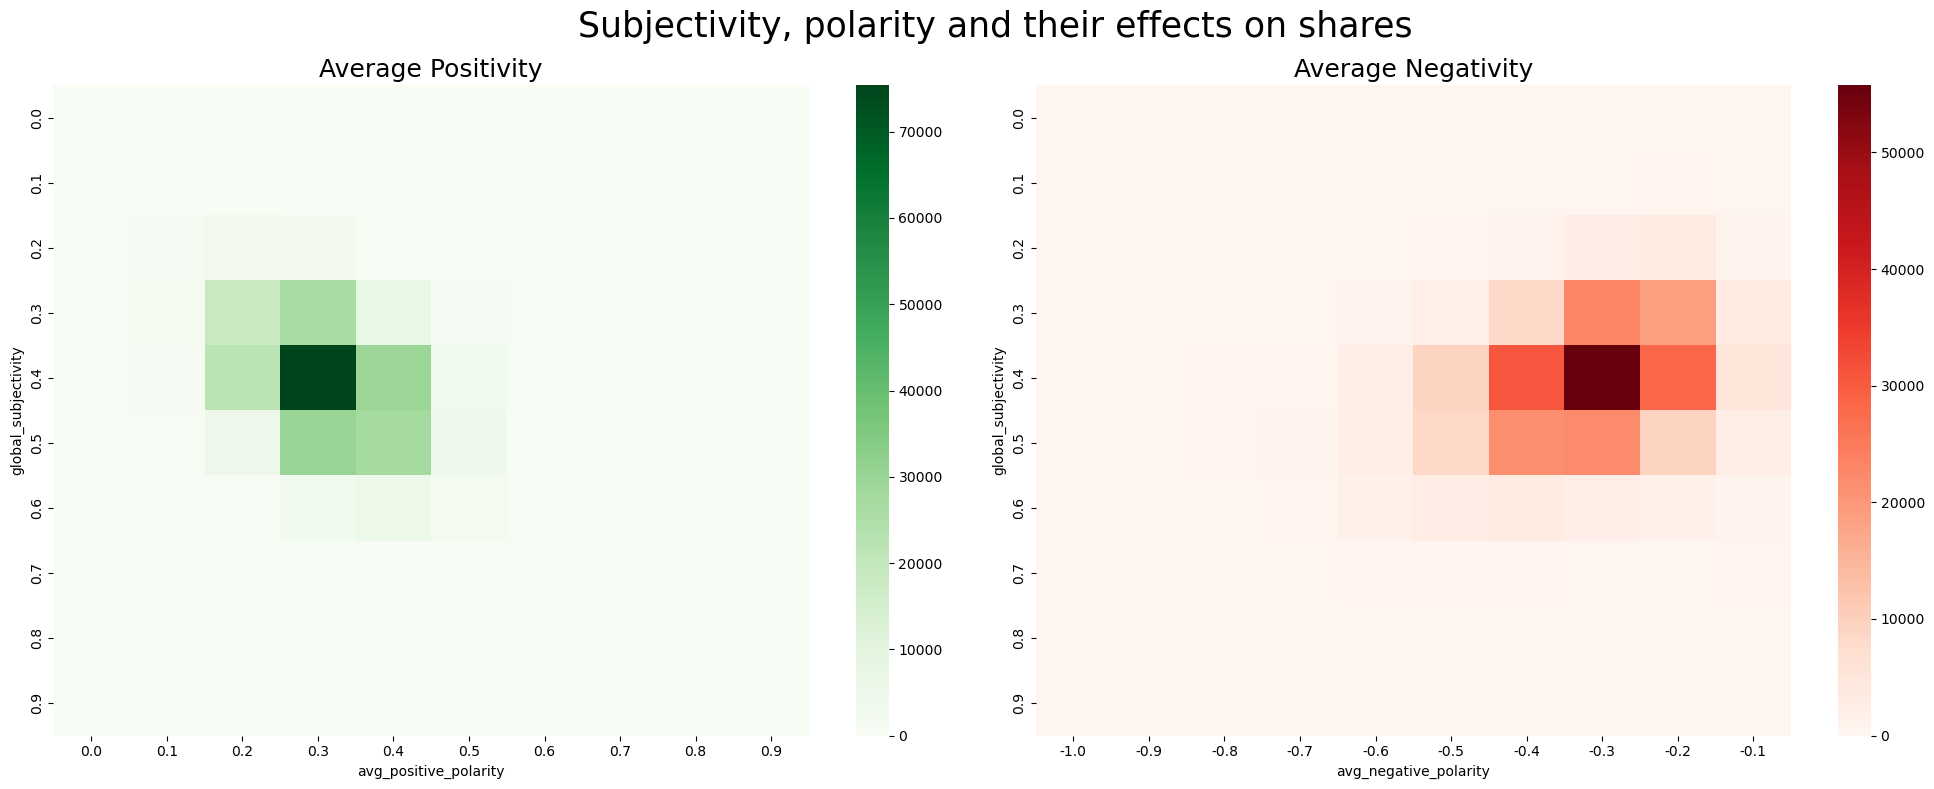

In [63]:
pol_subj_wr_shares = v_news[["global_subjectivity", "avg_positive_polarity", "avg_negative_polarity", "shares"]]

discrete_pol_subj_wr_shares = pd.DataFrame()
bins_v = [round(x, 1) for x in np.arange(0, 1.1, 0.1)]
labels_v = [round(i, 1) for i in np.arange(0, 1, 0.1)]
bins_v_neg = [round(x, 1) for x in np.arange(-1, 0.1, 0.1)]
labels_v_neg = [round(i, 1) for i in np.arange(-1, 0, 0.1)]

discrete_pol_subj_wr_shares["global_subjectivity"] = pd.cut(pol_subj_wr_shares["global_subjectivity"],
       bins = bins_v,
       labels = labels_v)

discrete_pol_subj_wr_shares["avg_positive_polarity"] = pd.cut(pol_subj_wr_shares["avg_positive_polarity"],
       bins = bins_v,
       labels = labels_v)

discrete_pol_subj_wr_shares["avg_negative_polarity"] = pd.cut(pol_subj_wr_shares["avg_negative_polarity"],
       bins = bins_v,
       labels = labels_v)

discrete_pol_subj_wr_shares["avg_negative_polarity"] = pd.cut(pol_subj_wr_shares["avg_negative_polarity"],
       bins = bins_v_neg,
       labels = labels_v_neg)

discrete_pol_subj_wr_shares["shares"] = v_news["shares"]

discrete_pol_subj_wr_shares.reset_index(drop=True, inplace = True)

discrete_table_pol_positive_subj_wr_shares = pd.pivot_table(discrete_pol_subj_wr_shares,
                                                   index="global_subjectivity",
                                                   columns="avg_positive_polarity",
                                                   values="shares",
                                                   aggfunc="sum").fillna(0)

discrete_table_pol_negative_subj_wr_shares = pd.pivot_table(discrete_pol_subj_wr_shares,
                                                   index="global_subjectivity",
                                                   columns="avg_negative_polarity",
                                                   values="shares",
                                                   aggfunc="sum").fillna(0)

f, axs = plt.subplots(1, 2, figsize = (20, 8))

sns.heatmap(discrete_table_pol_positive_subj_wr_shares, ax = axs[0], cmap="Greens")
sns.heatmap(discrete_table_pol_negative_subj_wr_shares, ax = axs[1], cmap="Reds")

axs[0].set_title("Average Positivity", size = 18)
axs[1].set_title("Average Negativity", size=18)
plt.suptitle("Subjectivity, polarity and their effects on shares", size = 25)

plt.tight_layout()

##### Number of shares per author and type of article

In [64]:
n_shares_wr_author_chanel = pd.pivot_table(v_news, 
                                           index="Authors", 
                                           columns="Chanel", 
                                           values="shares", 
                                           aggfunc="sum").fillna(0)
n_shares_wr_author_chanel["cumsum"] = np.sum(n_shares_wr_author_chanel, axis=1)
n_shares_wr_author_chanel.sort_values(by="cumsum", ascending=False, inplace=True)
n_shares_wr_author_chanel.drop(labels="cumsum", axis=1, inplace=True)
top10_n_shares_wr_author_chanel = n_shares_wr_author_chanel.head(10)

fig = px.bar(top10_n_shares_wr_author_chanel, height=400,
             color_discrete_sequence=Magma7, 
             title="Number of shares per author and types of articles written")
fig.show()

##### Shares with respect to day of release

Source for the graph : https://www.python-graph-gallery.com/web-circular-barplot-with-matplotlib

In [72]:
week_ref = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
dor = v_news[["Weekday", "shares"]].groupby(by="Weekday").sum().reindex(week_ref)

shares
Weekday                
Monday     47454.244103
Tuesday    52635.835104
Wednesday  52646.146573
Thursday   51397.493057
Friday     40607.366557
Saturday   17952.461647
Sunday     19980.598750

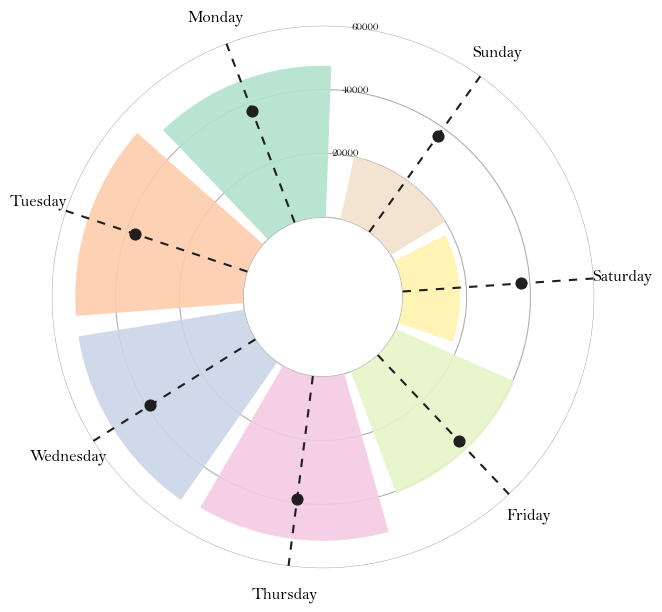

In [181]:
week_ref = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
dor = v_news[["Weekday", "shares"]].groupby(by="Weekday").sum().reindex(week_ref)
means_5000 = (v_news[["Weekday", "shares"]].groupby(by="Weekday").mean().values * 5000)

angles = np.linspace(0.05, 2 * np.pi - 0.05, dor.shape[0], endpoint=False)

GREY12 = "#1f1f1f"
plt.rcParams.update({"font.family": "Bell MT"})

plt.rc("axes", unicode_minus=False)
f, ax = plt.subplots(figsize=(7, 10), subplot_kw={"projection": "polar"})
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-25000, 60000)

ax.bar(angles,
       dor["shares"],
       width=0.80,
       color = Pastel2_7,
       alpha = 0.9,
       zorder=10)

ax.vlines(angles, 
          0, 
          60000, 
          color=GREY12, 
          ls=(0, (4, 4)), 
          zorder=11)

ax.scatter(angles, 
           means_5000, 
           s=60, 
           color=GREY12, 
           zorder=11)

ax.xaxis.grid(False)


ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")


ax.set_xticks(angles)
ax.set_yticklabels([])
ax.set_yticks([0, 20000, 40000, 60000])

XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(10)

PAD = 10
ax.text(-0.3*np.pi / 2, 20000 + PAD, "20000", ha="center", size=8)
ax.text(-0.3*np.pi / 2, 40000 + PAD, "40000", ha="center", size=8)
ax.text(-0.3*np.pi / 2, 60000 + PAD, "60000", ha="center", size=8)

ax.set_xticklabels(week_ref, size=12);

In [130]:
means = (v_news[["Weekday", "shares"]].groupby(by="Weekday").mean().values * 10000)
means

array([[74824.70343954],
       [74508.15528849],
       [77615.48485411],
       [77354.23441572],
       [74155.95593226],
       [74072.3826399 ],
       [74003.57966461]])

In [86]:
angles

array([0.05      , 0.93331219, 1.81662437, 2.69993656, 3.58324875,
       4.46656093, 5.34987312])

In [92]:
valz = dor.values

# IN PROGRESS

##### Average polarity and subjectivity, how they interact and affect shares of a given article

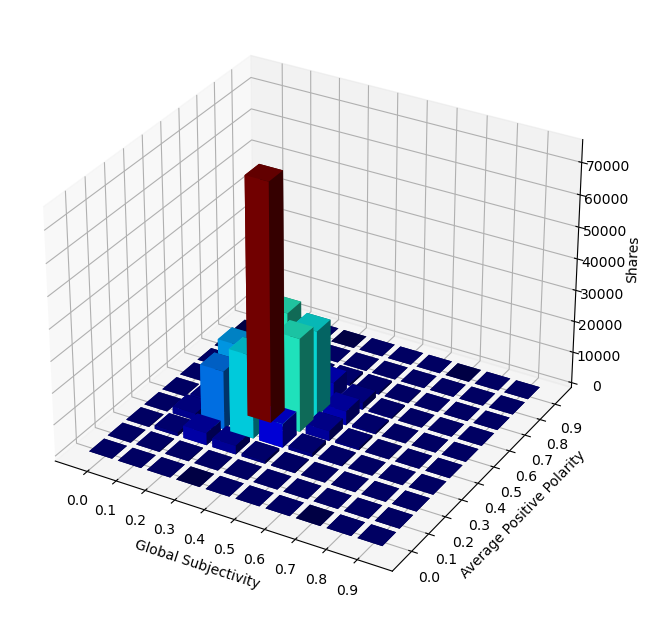

In [65]:
pol_subj_wr_shares = v_news[["global_subjectivity", "avg_positive_polarity", "avg_negative_polarity", "shares"]]

descrete_pol_subj_wr_shares = pd.DataFrame()
bins_v = [round(x, 1) for x in np.arange(0, 1.1, 0.1)]
labels_v = [round(i, 1) for i in np.arange(0, 1, 0.1)]
bins_v_neg = [round(x, 1) for x in np.arange(-1, 0.1, 0.1)]
labels_v_neg = [round(i, 1) for i in np.arange(-1, 0, 0.1)]

descrete_pol_subj_wr_shares["global_subjectivity"] = pd.cut(pol_subj_wr_shares["global_subjectivity"],
       bins = bins_v,
       labels = labels_v)

descrete_pol_subj_wr_shares["avg_positive_polarity"] = pd.cut(pol_subj_wr_shares["avg_positive_polarity"],
       bins = bins_v,
       labels = labels_v)

descrete_pol_subj_wr_shares["avg_negative_polarity"] = pd.cut(pol_subj_wr_shares["avg_negative_polarity"],
       bins = bins_v,
       labels = labels_v)

descrete_pol_subj_wr_shares["avg_negative_polarity"] = pd.cut(pol_subj_wr_shares["avg_negative_polarity"],
       bins = bins_v_neg,
       labels = labels_v_neg)

descrete_pol_subj_wr_shares["shares"] = pol_subj_wr_shares["shares"]

discrete_table_pol_subj_wr_shares = pd.pivot_table(descrete_pol_subj_wr_shares,
                                                   index="global_subjectivity",
                                                   columns="avg_positive_polarity",
                                                   values="shares",
                                                   aggfunc="sum").fillna(0)

dx, dy = 0.8, 0.8
fig = plt.figure(figsize=(10,6))
_=ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

xpos=np.arange(discrete_table_pol_subj_wr_shares.shape[0])
ypos=np.arange(discrete_table_pol_subj_wr_shares.shape[1])

ax.set_xticks(xpos + dx/2)
ax.set_yticks(ypos + dy/2)

xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten()
ypos = ypos.flatten()

zpos=np.zeros(discrete_table_pol_subj_wr_shares.shape).flatten()

dz = discrete_table_pol_subj_wr_shares.values.ravel()

offset = dz + np.abs(dz.min())
fracs = offset.astype(float)/offset.max()
norm = plt_colors.Normalize(fracs.min(), fracs.max())
colors = cm.jet(norm(fracs))

ax.bar3d(xpos,ypos,zpos,dx,dy,dz, color=colors)

# put the column / index labels
ax.w_yaxis.set_ticklabels(discrete_table_pol_subj_wr_shares.columns)
ax.w_xaxis.set_ticklabels(discrete_table_pol_subj_wr_shares.index)

# name the axes
_=ax.set_xlabel('Global Subjectivity')
_=ax.set_ylabel('Average Positive Polarity')
_=ax.set_zlabel('Shares')

plt.autoscale(enable=True, axis='both', tight=True)
plt.grid()
plt.show()

In [66]:
pol_subj_wr_shares = v_news[["global_subjectivity", "avg_positive_polarity", "avg_negative_polarity", "shares"]]

discrete_pol_subj_wr_shares = pd.DataFrame()
bins_v = [round(x, 1) for x in np.arange(0, 1.1, 0.1)]
labels_v = [round(i, 1) for i in np.arange(0, 1, 0.1)]
bins_v_neg = [round(x, 1) for x in np.arange(-1, 0.1, 0.1)]
labels_v_neg = [round(i, 1) for i in np.arange(-1, 0, 0.1)]

discrete_pol_subj_wr_shares["global_subjectivity"] = pd.cut(pol_subj_wr_shares["global_subjectivity"],
       bins = bins_v,
       labels = labels_v)

discrete_pol_subj_wr_shares["avg_positive_polarity"] = pd.cut(pol_subj_wr_shares["avg_positive_polarity"],
       bins = bins_v,
       labels = labels_v)

discrete_pol_subj_wr_shares["avg_negative_polarity"] = pd.cut(pol_subj_wr_shares["avg_negative_polarity"],
       bins = bins_v,
       labels = labels_v)

discrete_pol_subj_wr_shares["avg_negative_polarity"] = pd.cut(pol_subj_wr_shares["avg_negative_polarity"],
       bins = bins_v_neg,
       labels = labels_v_neg)

discrete_pol_subj_wr_shares["shares"] = v_news["shares"]

discrete_pol_subj_wr_shares.reset_index(drop=True, inplace = True)

source = ColumnDataSource(descrete_pol_subj_wr_shares)

# this is the colormap from the original NYTimes plot
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors, 
                           low=discrete_pol_subj_wr_shares.shares.min(), 
                           high=discrete_pol_subj_wr_shares.shares.max())

p = figure(width=800, height=300, title="US unemployment 1948—2016")

p.rect(x="global_subjectivity", y="avg_positive_polarity", width=1, height=1, source=source,
       line_color=None, fill_color=transform('shares', mapper))

color_bar = ColorBar(color_mapper=mapper,
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%d%%"))

p.add_layout(color_bar, 'right')

p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "7px"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = 1.0

_=show(p, notebook_handle=True)